In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Prediction using Unsupervised ML

### Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters 
### and represent it visually

### by Aarushi Tiwari

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Applying the KMeans Clustering

In [ ]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [ ]:
#The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance,
#minimizing a criterion known as the inertia or within-cluster sum-of-squares

In [ ]:
#applying kmeans of different numbers of clusters to calculate optimum cluster
from sklearn.cluster import KMeans
vari = []

for i in range(1, 11):
    KModel = KMeans(n_clusters = i)
    KModel.fit(x)
    vari.append(KModel.inertia_) ##within-cluster sum-of-squares  
    print(KModel.inertia_)

681.3705999999996
152.34795176035797
78.851441426146
57.22847321428572
46.44618205128204
39.03998724608725
34.305815295815314
30.064593073593088
28.752929154179178
26.486573184734688


#### Visualizing the ditstribution of variance( within cluster sum-of-squares) vs number of clusters

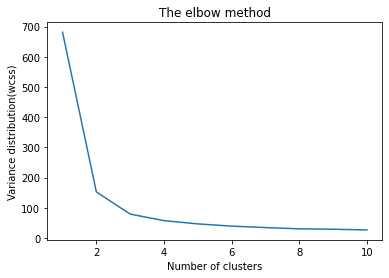

In [ ]:
plt.plot(range(1, 11), vari)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Variance distribution(wcss)') # Within cluster sum of squares
plt.show()

here we will take number of clusters = 3 cause at 3 wcss doesn't decrease significantly with every iteration.

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
KModel = KMeans(n_clusters = 3)
ykmeans_ = KModel.fit_predict(x)

In [ ]:
pd.crosstab(iris.target, KModel.labels_)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,48,2
2,0,14,36


### Visualizing the cluster

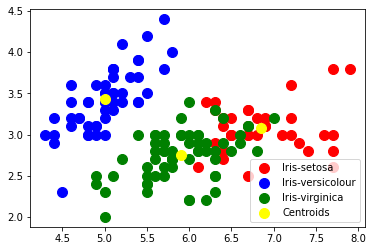

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()